# Manipulation des matrices et des vecteurs avec NumPy

![image](./images/numpy.png)

# NumPy

NumPy est un package Python spécialement adaptée à la manipulation de matrices ou de tableaux multidimensionnels et possédant des fonctions mathématiques opérant sur ces tableaux.

Généralement pour simplifier l’appel aux fonctions NumPy, on utilise :
```
import numpy as np
```
Il est installé par défaut dans la suite Anaconda.

In [1]:
import numpy as np

# NumPy et les arrays

- Les arrays sont des structures centrales pour travailler en data science. 
- Les arrays de NumPy sont utilisées comme des vecteurs ou des matrices
- On crée un array en utilisant la fonction `np.array()`, on peut créer un array à partir d’une liste ou de plusieurs listes
- Les arrays ne se compose que d’un type de données (dans sa forme classique)
- Pour connaître la taille d’un array, on utilise la fonction `.shape`
- Pour connaître le type de données dans l’array, on utilise `.dtype`

In [2]:
#1er array
arr1=np.array([3,5,7])
print(arr1.shape,arr1.dtype)

(3,) int32


In [3]:
arr1.shape

(3,)

In [4]:
arr2=np.array([4,np.nan,7])

In [5]:
arr2.dtype

dtype('float64')

In [6]:
arr2

array([ 4., nan,  7.])

## Un peu de vocabulaire

- Les dimensions sont appelées `axis` (`axis=0` : colonnes, `axis=1` : lignes)
- Le nombre de dimensions est appelé `.ndim`
- La taille (`.size`) est le nombre total d’éléments d’un array
- La forme est associée à `.shape`

# Numpy et les arrays

On peut générer des arrays de manière simple :

In [7]:
np.array([ ], dtype=float)

array([], dtype=float64)

In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [9]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
np.empty(5)

array([0., 0., 0., 0., 0.])

In [11]:
np.full((2,3), 10)

array([[10, 10, 10],
       [10, 10, 10]])

# D'autres générateurs d'arrays

- `np.arange(5)` pour créer un array de taille 5 avec des valeurs de 0 à 4, on peut utilise `start=`, `stop=` et `step=`
- On peut utiliser arange avec des float mais on préfère généralement `np.linspace`
    - Cette fonction génère un nombre donné de valeur équidistante entre deux bornes


In [12]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

# Premières opérations arithmétiques

Les opérations arithmétiques de bases se font terme à terme

`*`, `+`, `-`, `/`, `**` (puissance), `%` (modulo)


In [13]:
arr2=np.arange(1,4)

In [14]:
print(arr2+arr2)
print(arr2*arr2)
print(arr2/arr2)
# attention les vecteurs doivent avoir les mêmes dimensions

[2 4 6]
[1 4 9]
[1. 1. 1.]


## Un cas spécifique : le broadcasting

Dans certains cas, on peut affectuer des calculs entre des arrays de tailles différentes.

Pour pouvoir faire cela, il suffit d'avoir une dimension commune, on a :

In [15]:
arr_id=np.eye(3)
arr_id+arr2

array([[2., 2., 3.],
       [1., 3., 3.],
       [1., 2., 4.]])

In [16]:
arr_id.shape

(3, 3)

In [17]:
arr2.shape

(3,)

### Le broadcasting sur une image avec NumPy

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
image_ny=plt.imread("./Data/New York.jpg")

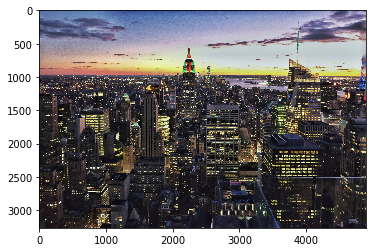

In [20]:
plt.imshow(image_ny)

In [21]:
type(image_ny)

numpy.ndarray

In [22]:
arr_transfo=np.array([0,0,100])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


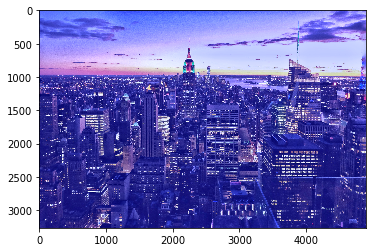

In [23]:
plt.imshow(image_ny+arr_transfo)

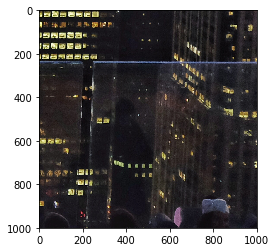

In [24]:
plt.imshow(image_ny[-1000:,-1000:])

In [25]:
image_ny.shape

(3264, 4896, 3)

# Manipulation d'arrays

L'indexation des arrays est similaire à celle des listes :
- Accéder à un élément : `arr1[i]`
- Si on veut plusieurs éléments, on peut utiliser `arr1[i:j]`
- On peut aussi fixer des valeurs pour plusieurs éléments : `arr1[i:j]=100`
- On peut aussi modifier toutes les valeurs de l’array : `array[:]=100`
- Si on veut garder l’array initial on utilise `.copy()`


**Exercice : **
    
Générer un array avec des valeurs entre 0 et 8, afficher les éléments 1 à 6 puis modifiez les élément 6 à 8 en leur fixant la valeur de 22.


In [27]:
arr_range=np.arange(9)

In [28]:
arr_range[1:6]

array([1, 2, 3, 4, 5])

In [30]:
arr_range[6:]=22
arr_range

array([ 0,  1,  2,  3,  4,  5, 22, 22, 22])

# Passage au cas bidimensionnel

Le seule attribut qui change est `.shape`, on peut utiliser la méthode `.reshape()`

In [31]:
arr_2dim=np.arange(10).reshape(5,2)

In [32]:
arr_2dim

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [33]:
# Pour fixer une valeur pour tous les éléments d’une ligne, on utilise 
arr_2dim[2]=22
# Pour fixer une valeur pour un seul élément, on utilise 
arr_2dim[3,1]=33
# On peut aussi sélectionner des sous-parties d’un array à 2 dimensions

In [34]:
arr_2dim[1:3,0]

array([ 2, 22])

In [35]:
arr_2dim[1:3]

array([[ 2,  3],
       [22, 22]])

In [36]:
arr_2dim[:,1]

array([ 1,  3, 22, 33,  9])

In [37]:
arr3=np.random.random(8)
arr3

array([0.63203086, 0.71710809, 0.90055127, 0.40499402, 0.224658  ,
       0.53438617, 0.72725452, 0.29790236])

In [38]:
arr3.shape=(4,2)

In [39]:
arr3=arr3.reshape(4,2)

# Opérations matricielles sur les arrays

On peut créer une matrice (un array) en utilisant la fonction `.reshape` :
- Pour créer une matrice 4 x 5 à partir d’une suite de 20 nombres, on utilise :
```
np.arange(20).reshape((4,5))
```
- Transposée : `.T`
- Produit matriciel `np.dot()`

**Exercice :**

Construire une matrice rectangulaire de taille 3 x 2 avec une suite de nombres commençant à 5, calculer le produit de la transposée par la matrice.

In [40]:
mat=np.arange(5,11).reshape(3,2)

In [41]:
mat

array([[ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [42]:
np.dot(mat.T,mat)

array([[155, 176],
       [176, 200]])

In [43]:
mat.T.dot(mat)

array([[155, 176],
       [176, 200]])

In [44]:
np.dot(np.transpose(mat),mat)

array([[155, 176],
       [176, 200]])

In [45]:
mat.transpose().dot(mat)

array([[155, 176],
       [176, 200]])

In [46]:
np.mean(mat) == mat.mean()

True

# Les fonctions universelles sur les arrays
NumPy possède de nombreuses fonctions sur les arrays permettant de manipuler des arrays
- `np.where(condition, A, B)` permet de faire une condition de manière simple
- `np.sum()`
- `np.mean()`
- `np.std()`
- `np.var()`
- `np.median()`
- `np.percentile()`
- `np.average()` : moyenne pondérée


Sur des booléens :
- `np.any()` au moins un `True`
- `np.all()` tous `True`

Les tris :
- `np.sort()`
- `np.argsort()`

Sur des chaînes :
- `np.unique()` permet d’obtenir chaque valeur unique
- `np.in1d(,)` permet de vérifier si les éléments du 1er membre se trouvent dans le second



In [55]:
arr3=np.random.random(100000).reshape(-1,10)

In [56]:
%%timeit
# bonne approche
arr4 = np.where(arr3 < 0.5, 0.5, arr3)

413 µs ± 9.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%%timeit
# mauvaise approche
arr4=arr3.copy()
for i in range(arr3.shape[0]):
    for j in range(arr3.shape[1]):
         if arr3[i,j]<0.5:
                arr4[i,j]=0

26 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Exercice :**

Générer un array de nombres aléatoires `np.random.randn()` puis remplacer les valeurs plus petites que  0 par 0. Trier l’array obtenu


In [58]:
array_random=np.random.randn(10000)

In [59]:
array_condition=np.where(array_random<0,0,array_random)

In [60]:
print(array_random.min(),array_random.mean(),array_random.std(),array_random.max())
print(array_condition.min(),array_condition.mean(),array_condition.std(),array_condition.max())

-3.5549354094254038 0.0018028152748928575 1.0046418123276235 3.821331110452598
0.0 0.4010169480965875 0.589084313483406 3.821331110452598


# Sauvegarder et charger des arrays

On utilise :
- `np.save('mon_array',mon_array)` pour sauver un array
- `np.load('mon_array.npy')` pour charger un array
- `np.savez('ziparray.npz', x=mon_array, y=mpn_array2)` sauvegarder en zip plusieurs arrays
- `np.savetxt('textfile.txt', mon_array, delimiter=';')` pour sauvegarder un array dans un fichier texte
- `np.loadtxt('textfile.txt', delimiter=';')` pour charger un array depuis un fichier texte


**Exercice :**
    
Générer une matrice simple et sauvegarder cette matrice dans array.npy puis dans array.txt


In [62]:
np.save("./array.npy",array_condition)

In [63]:
del array_condition

In [64]:
arr_condition=np.load("./array.npy")

In [65]:
arr_condition

array([1.29517554, 0.        , 1.25630921, ..., 0.71540508, 0.48540303,
       0.2870138 ])